# K-Nearest Neighbors (K-NN)

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt

## Imoporting the Dataset

In [2]:
dataset = pd.read_csv("C:\\Users\\anima\\Downloads\\valuedseed classification models(1)\\valuedseed classification models\\Logistic Regression\\Python\\Social_Network_Ads.csv")
dataset

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [3]:
x = dataset.iloc[:, :-1].values # Assigning inputs and outputs
y = dataset.iloc[:, -1].values # Use the .values function to convert to an array

In [4]:
len(x)

400

In [5]:
len(y)

400

## 

## Splitting the dataset into the Trainning and Testing set

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [7]:
len(x_train) == len(y_train), len(x_test) == len(y_test)

(True, True)

## Feature scaling

In [8]:
sc =StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [9]:
x_train

array([[ 1.92295008e+00,  2.14601566e+00],
       [ 2.02016082e+00,  3.78719297e-01],
       [-1.38221530e+00, -4.32498705e-01],
       [-1.18779381e+00, -1.01194013e+00],
       [ 1.92295008e+00, -9.25023920e-01],
       [ 3.67578135e-01,  2.91803083e-01],
       [ 1.73156642e-01,  1.46942725e-01],
       [ 2.02016082e+00,  1.74040666e+00],
       [ 7.56421121e-01, -8.38107706e-01],
       [ 2.70367388e-01, -2.87638347e-01],
       [ 3.67578135e-01, -1.71750061e-01],
       [-1.18475597e-01,  2.20395980e+00],
       [-1.47942605e+00, -6.35303205e-01],
       [-1.28500455e+00, -1.06988428e+00],
       [-1.38221530e+00,  4.07691369e-01],
       [-1.09058306e+00,  7.55356227e-01],
       [-1.47942605e+00, -2.00722133e-01],
       [ 9.50842613e-01, -1.06988428e+00],
       [ 9.50842613e-01,  5.81523798e-01],
       [ 3.67578135e-01,  9.87132798e-01],
       [ 5.61999628e-01, -8.96051849e-01],
       [-6.04529329e-01,  1.45068594e+00],
       [-2.12648508e-02, -5.77359062e-01],
       [-6.

## Training the K-NN model with training set

In [11]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p =2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [19]:
def knn_model(train_features, train_output, test_features, test_output, k):
    from sklearn.neighbors import KNeighborsClassifier
    import matplotlib.pyplot as plt
    from sklearn.metrics import accuracy_score, mean_squared_error
    k_values = []
    rmse = []
    mod_acc = []
    pred_values = []
    model_values = {}
    k = [i for i in range(1,15,2)]
    for kn in k:
        k_class = KNeighborsClassifier(n_neighbors = kn, metric = 'minkowski', p =2)
        k_class.fit(train_features, train_output)
        
        pred = k_class.predict(test_features)
        model_acc = accuracy_score(test_output, pred)
        error = mean_squared_error(test_output, pred) ** 0.5
        k_values.append(kn)
        rmse.append(error)
        mod_acc.append(model_acc)
        pred_values.append(pred)
        
        
    model_values.update({'k_value' : k_values,
                        'Predicted_values': pred_values,
                        'Model_Accuracy': mod_acc,
                        'RMSE': rmse})
    plt.plot(model_values['k_value'], model_values['RMSE'], color = 'blue')
    plt.xlabel('k_values')
    plt.ylabel('RMSE')
    return plt.show(), model_values

C:\Users\anima\anaconda03\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\anima\anaconda03\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

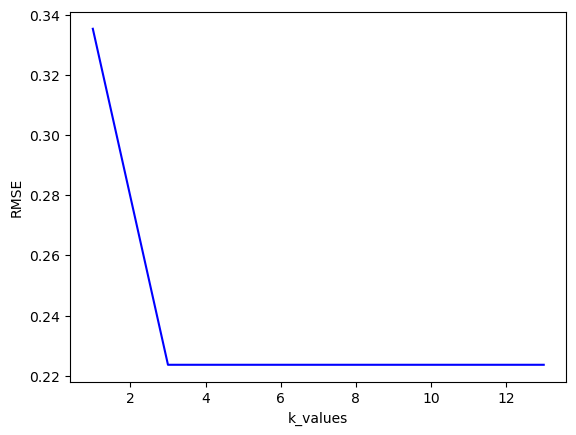

(None,
 {'k_value': [1, 3, 5, 7, 9, 11, 13],
  'Predicted_values': [array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
          0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
          1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
          0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64),
   array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
          0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
          1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
          0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64),
   array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
          0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
          1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
          0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64),
   array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0

In [20]:
knn_model(x_train, y_train, x_test, y_test, 15)